In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import time

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
service = Service(chromedriver_path)

driver = webdriver.Chrome(service=service, options=options)

# ✅ Step 2: Open the Cricbuzz IPL 2020 news page
url = "https://www.cricbuzz.com/cricket-series/3130/indian-premier-league-2020/news"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# ✅ Step 3: Scroll down to load more articles
for _ in range(5):
    driver.execute_script("window.scrollBy(0, 500);")
    time.sleep(2)

# ✅ Step 4: Extract headlines and links
articles = driver.find_elements(By.CSS_SELECTOR, "a.cb-nws-hdln-ancr")  # Update selector if needed

data = []
for article in articles:
    title = article.text.strip()
    link = article.get_attribute("href")

    if title and link:
        print(f"✅ Scraping article: {title}")

        # Store data
        data.append({"Title": title, "Link": link})

# ✅ Step 5: Save data to CSV
filename = "Cricbuzz_Headlines_IPL2020.csv"
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Step 6: Close the browser
driver.quit()

print(f"✅ Data scraped and saved to {filename}")

✅ Scraping article: Are Mumbai Indians the most dominant team in IPL history?
✅ Scraping article: Delhi Capitals: Two halves that didn't make a whole
✅ Scraping article: IPL 2020: Cricbuzz Team of the Tournament
✅ Scraping article: The mutualism of Mumbai Indians and Rohit Sharma
✅ Scraping article: Even in defeat, Delhi play peekaboo with a world of possibilities
✅ Scraping article: Amidst the riches, the IPL retains its youthful zest
✅ Scraping article: 'Wanted to break the jinx of winning alternative years, and create history'
✅ Scraping article: Rohit, Boult lead Mumbai Indians to fifth IPL title
✅ Scraping article: 'The greatest T20 team of all time'
✅ Scraping article: Live Cricket Score - MI vs DC, IPL 2020 Final
✅ Scraping article: Sunrisers Hyderabad: Another podium finish in the face of adversity
✅ Scraping article: Mumbai Indians: The team that defied trade-offs
✅ Scraping article: Rohit not reading much into 'psychological advantage' over Delhi Capitals
✅ Scraping article: 

In [3]:
df = pd.read_csv("Cricbuzz_Headlines_IPL2020.csv")
print(df.head())  # Display first few rows

                                               Title  \
0  Are Mumbai Indians the most dominant team in I...   
1  Delhi Capitals: Two halves that didn't make a ...   
2          IPL 2020: Cricbuzz Team of the Tournament   
3   The mutualism of Mumbai Indians and Rohit Sharma   
4  Even in defeat, Delhi play peekaboo with a wor...   

                                                Link  
0  https://www.cricbuzz.com/cricket-news/114875/a...  
1  https://www.cricbuzz.com/cricket-news/114873/d...  
2  https://www.cricbuzz.com/cricket-news/114867/i...  
3  https://www.cricbuzz.com/cricket-news/114865/t...  
4  https://www.cricbuzz.com/cricket-news/114864/e...  


In [5]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
service = Service(chromedriver_path)

driver = webdriver.Chrome(service=service, options=options)

# ✅ Step 2: Open the Cricbuzz IPL 2020 news page
url = "https://www.cricbuzz.com/cricket-series/3130/indian-premier-league-2020/news"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# ✅ Step 3: Scroll down to load more articles
for _ in range(5):
    driver.execute_script("window.scrollBy(0, 500);")
    time.sleep(2)

# ✅ Step 4: Extract headlines and article links
articles = driver.find_elements(By.CSS_SELECTOR, "a.cb-nws-hdln-ancr")  # Ensure selector is correct

data = []
for article in articles:
    title = article.text.strip()
    link = article.get_attribute("href")

    if title and link:
        print(f"✅ Scraping article: {title}")

        # Open the article page
        driver.get(link)
        time.sleep(3)

        # ✅ Step 5: Extract full article text
        paragraphs = driver.find_elements(By.CSS_SELECTOR, "div.cb-nws-body p")  # Modify selector if needed
        content = " ".join([p.text for p in paragraphs])

        # ✅ Step 6: Store the data
        data.append({"Title": title, "Link": link, "Content": content})

        # Go back to the main page
        driver.back()
        time.sleep(2)

# ✅ Step 7: Save data to CSV
filename = "Cricbuzz_FullArticles_IPL2020.csv"
df_cricbuzz = pd.DataFrame(data)
df_cricbuzz.to_csv(filename, index=False)

# ✅ Step 8: Close the browser
driver.quit()

print(f"✅ Data scraped and saved to {filename}")

✅ Scraping article: Are Mumbai Indians the most dominant team in IPL history?


StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=134.0.6998.89); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
0   chromedriver                        0x0000000104f29804 cxxbridge1$str$ptr + 2785964
1   chromedriver                        0x0000000104f21ddc cxxbridge1$str$ptr + 2754692
2   chromedriver                        0x0000000104a75ea8 cxxbridge1$string$len + 92928
3   chromedriver                        0x0000000104a867d4 cxxbridge1$string$len + 160812
4   chromedriver                        0x0000000104a85888 cxxbridge1$string$len + 156896
5   chromedriver                        0x0000000104a7c458 cxxbridge1$string$len + 118960
6   chromedriver                        0x0000000104a7ab64 cxxbridge1$string$len + 112572
7   chromedriver                        0x0000000104a7dd74 cxxbridge1$string$len + 125388
8   chromedriver                        0x0000000104a7de1c cxxbridge1$string$len + 125556
9   chromedriver                        0x0000000104ab8100 cxxbridge1$string$len + 363864
10  chromedriver                        0x0000000104ab2878 cxxbridge1$string$len + 341200
11  chromedriver                        0x0000000104afe678 cxxbridge1$string$len + 651984
12  chromedriver                        0x0000000104ab135c cxxbridge1$string$len + 335796
13  chromedriver                        0x0000000104eeecd4 cxxbridge1$str$ptr + 2545532
14  chromedriver                        0x0000000104ef1fa0 cxxbridge1$str$ptr + 2558536
15  chromedriver                        0x0000000104eced04 cxxbridge1$str$ptr + 2414508
16  chromedriver                        0x0000000104ef2800 cxxbridge1$str$ptr + 2560680
17  chromedriver                        0x0000000104ebfba0 cxxbridge1$str$ptr + 2352712
18  chromedriver                        0x0000000104f1245c cxxbridge1$str$ptr + 2690820
19  chromedriver                        0x0000000104f125e4 cxxbridge1$str$ptr + 2691212
20  chromedriver                        0x0000000104f21a50 cxxbridge1$str$ptr + 2753784
21  libsystem_pthread.dylib             0x000000019c8882e4 _pthread_start + 136
22  libsystem_pthread.dylib             0x000000019c8830fc thread_start + 8


In [7]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
service = Service(chromedriver_path)

driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)  # Wait for elements to load

# ✅ Step 2: Open the Cricbuzz IPL 2020 news page
url = "https://www.cricbuzz.com/cricket-series/3130/indian-premier-league-2020/news"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# ✅ Step 3: Scroll down to load more articles
for _ in range(5):
    driver.execute_script("window.scrollBy(0, 500);")
    time.sleep(2)

# ✅ Step 4: Extract headlines and article links (Re-locate elements to prevent StaleElementReferenceException)
articles = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "a.cb-nws-hdln-ancr")))

data = []
for i in range(len(articles)):
    try:
        # ✅ Re-locate elements before clicking to avoid stale element issues
        articles = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "a.cb-nws-hdln-ancr")))
        article = articles[i]
        title = article.text.strip()
        link = article.get_attribute("href")

        if title and link:
            print(f"✅ Scraping article: {title}")

            # Open the article page
            driver.get(link)
            time.sleep(3)

            # ✅ Step 5: Extract full article text
            paragraphs = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.cb-nws-body p")))
            content = " ".join([p.text for p in paragraphs])

            # ✅ Step 6: Store the data
            data.append({"Title": title, "Link": link, "Content": content})

            # ✅ Step 7: Go back to the main page and re-load elements
            driver.back()
            time.sleep(3)

    except Exception as e:
        print(f"❌ Skipping article due to error: {e}")

# ✅ Step 8: Save data to CSV
filename = "Cricbuzz_FullArticles_IPL2020.csv"
df_cricbuzz = pd.DataFrame(data)
df_cricbuzz.to_csv(filename, index=False)

# ✅ Step 9: Close the browser
driver.quit()

print(f"✅ Data scraped and saved to {filename}")

✅ Scraping article: Are Mumbai Indians the most dominant team in IPL history?
❌ Skipping article due to error: Message: 

✅ Scraping article: Mandhana proud to finish strong after RCB's season of missed moments
❌ Skipping article due to error: Message: 

✅ Scraping article: Spirited RCB deny MI direct entry to final
❌ Skipping article due to error: Message: 

✅ Scraping article: West Indies, England to tour Ireland in 2025
❌ Skipping article due to error: Message: 

✅ Scraping article: MCG to host day-night Australia-England clash to celebrate 150 years of Test cricket
❌ Skipping article due to error: Message: 

✅ Scraping article: MI eye direct entry into WPL final as RCB look to avoid wooden spoon
❌ Skipping article due to error: Message: 

❌ Skipping article due to error: list index out of range
❌ Skipping article due to error: list index out of range
❌ Skipping article due to error: list index out of range
❌ Skipping article due to error: list index out of range
❌ Skipping article 

In [9]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
service = Service(chromedriver_path)

driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)  # Wait for elements to load

# ✅ Step 2: Open the Cricbuzz IPL 2020 news page
url = "https://www.cricbuzz.com/cricket-series/3130/indian-premier-league-2020/news"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# ✅ Step 3: Scroll down to load more articles
for _ in range(5):
    driver.execute_script("window.scrollBy(0, 500);")
    time.sleep(2)

# ✅ Step 4: Extract headlines and links before clicking
articles = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "a.cb-nws-hdln-ancr")))

data = []
article_links = []

for article in articles:
    title = article.text.strip()
    link = article.get_attribute("href")

    if title and link:
        article_links.append((title, link))

# ✅ Step 5: Visit each article and extract content
for title, link in article_links:
    try:
        print(f"✅ Scraping article: {title}")

        # Open the article page
        driver.get(link)
        time.sleep(3)

        # ✅ Extract full article text
        paragraphs = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.cb-nws-body p")))
        content = " ".join([p.text for p in paragraphs])

        # ✅ Store the data
        data.append({"Title": title, "Link": link, "Content": content})

        # ✅ Return to the main page
        driver.get(url)
        time.sleep(3)

    except Exception as e:
        print(f"❌ Skipping article due to error: {e}")

# ✅ Step 6: Save data to CSV
filename = "Cricbuzz_FullArticles_IPL2020.csv"
df_cricbuzz = pd.DataFrame(data)
df_cricbuzz.to_csv(filename, index=False)

# ✅ Step 7: Close the browser
driver.quit()

print(f"✅ Data scraped and saved to {filename}")

✅ Scraping article: Are Mumbai Indians the most dominant team in IPL history?
❌ Skipping article due to error: Message: 

✅ Scraping article: Delhi Capitals: Two halves that didn't make a whole
❌ Skipping article due to error: Message: 

✅ Scraping article: IPL 2020: Cricbuzz Team of the Tournament
❌ Skipping article due to error: Message: 

✅ Scraping article: The mutualism of Mumbai Indians and Rohit Sharma
❌ Skipping article due to error: Message: 

✅ Scraping article: Even in defeat, Delhi play peekaboo with a world of possibilities
❌ Skipping article due to error: Message: 

✅ Scraping article: Amidst the riches, the IPL retains its youthful zest
❌ Skipping article due to error: Message: 

✅ Scraping article: 'Wanted to break the jinx of winning alternative years, and create history'
❌ Skipping article due to error: Message: 

✅ Scraping article: Rohit, Boult lead Mumbai Indians to fifth IPL title
❌ Skipping article due to error: Message: 

✅ Scraping article: 'The greatest T20 te

KeyboardInterrupt: 

In [12]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
service = Service(chromedriver_path)

driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)  # Wait for elements to load

# ✅ Step 2: Manually provide an article link (Choose any article from Cricbuzz)
article_link = "https://www.cricbuzz.com/cricket-news/114875/are-mumbai-indians-the-most-dominant-team-in-ipl-history"  # Replace with actual article link

# ✅ Step 3: Open the article page
driver.get(article_link)
time.sleep(5)

try:
    # ✅ Step 4: Extract article title
    title_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "h1.cb-nws-hdln")))
    title = title_element.text.strip()

    # ✅ Step 5: Extract article content
    paragraphs = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.cb-nws-body p")))
    content = " ".join([p.text for p in paragraphs])

    # ✅ Step 6: Save to CSV
    data = [{"Title": title, "Link": article_link, "Content": content}]
    df = pd.DataFrame(data)
    df.to_csv("Cricbuzz_Single_Article.csv", index=False)

    print(f"✅ Successfully scraped: {title}")
    print(f"✅ Data saved to Cricbuzz_Single_Article.csv")

except Exception as e:
    print(f"❌ Error scraping article: {e}")

# ✅ Step 7: Close the browser
driver.quit()

❌ Error scraping article: Message: 
Stacktrace:
0   chromedriver                        0x0000000102fb1804 cxxbridge1$str$ptr + 2785964
1   chromedriver                        0x0000000102fa9ddc cxxbridge1$str$ptr + 2754692
2   chromedriver                        0x0000000102afdea8 cxxbridge1$string$len + 92928
3   chromedriver                        0x0000000102b451d0 cxxbridge1$string$len + 384552
4   chromedriver                        0x0000000102b86678 cxxbridge1$string$len + 651984
5   chromedriver                        0x0000000102b3935c cxxbridge1$string$len + 335796
6   chromedriver                        0x0000000102f76cd4 cxxbridge1$str$ptr + 2545532
7   chromedriver                        0x0000000102f79fa0 cxxbridge1$str$ptr + 2558536
8   chromedriver                        0x0000000102f56d04 cxxbridge1$str$ptr + 2414508
9   chromedriver                        0x0000000102f7a800 cxxbridge1$str$ptr + 2560680
10  chromedriver                        0x0000000102f47ba0 cxxbri


This version should be more stable and handle errors more gracefully. It also doesn't require manual ChromeDriver installation or path specification.

In [27]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
options.add_argument("--headless=new")  # Run Chrome in headless mode
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)  # Wait for elements to load

# ✅ Step 2: Provide a Cricbuzz article link
article_link = "https://www.cricbuzz.com/cricket-news/114873/delhi-capitals-two-halves-that-didnt-make-a-whole"  # Replace with actual article link
driver.get(article_link)

# Wait for the page to load
time.sleep(5)

# ✅ Step 3: Extract Page Source & Use BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# ✅ Step 4: Extract Article Title using updated selector
title_element = soup.select_one("h1.spt-nws-dtl-hdln")  # Updated selector
title = title_element.text.strip() if title_element else "Title Not Found"

# ✅ Step 5: Extract Article Content
paragraphs = soup.select("div.cb-nws-body p")  # Assuming the article content structure remains the same
content = " ".join([p.text.strip() for p in paragraphs])

# ✅ Step 6: Save to CSV
data = [{"Title": title, "Link": article_link, "Content": content}]
df = pd.DataFrame(data)
df.to_csv("Cricbuzz_Single_Article.csv", index=False)

print(f"✅ Successfully scraped: {title}")
print(f"✅ Data saved to Cricbuzz_Single_Article.csv")

# ✅ Step 7: Close the browser
driver.quit()

✅ Successfully scraped: Delhi Capitals: Two halves that didn't make a whole
✅ Data saved to Cricbuzz_Single_Article.csv


In [31]:
df = pd.read_csv("Cricbuzz_Single_Article.csv")
print(df.head(5))  # Display first few rows

                                               Title  \
0  Delhi Capitals: Two halves that didn't make a ...   

                                                Link  Content  
0  https://www.cricbuzz.com/cricket-news/114873/d...      NaN  


In [35]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# ✅ Step 1: Set up Selenium WebDriver
chrome_binary_path = "/Users/anirudhravipudi/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
chromedriver_path = "/usr/local/bin/chromedriver"

options = Options()
options.binary_location = chrome_binary_path
options.add_argument("--headless=new")  # Run Chrome in headless mode
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)  # Wait for elements to load

# ✅ Step 2: Provide a Cricbuzz article link
article_link = "https://www.cricbuzz.com/cricket-news/114873/delhi-capitals-two-halves-that-didnt-make-a-whole"  # Replace with actual article link
driver.get(article_link)

# Wait for the page to load
time.sleep(5)

# ✅ Step 3: Extract Page Source & Use BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# ✅ Step 4: Extract Article Title using updated selector
title_element = soup.select_one("h1.spt-nws-dtl-hdln")  # Updated selector
title = title_element.text.strip() if title_element else "Title Not Found"

# ✅ Step 5: Extract Article Content
content_section = soup.select_one("section.cb-spt-news-dtl-itms.cb-sptlt-sctn")
if content_section:
    paragraphs = content_section.find_all("p", class_="cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs if p.text.strip()])
else:
    content = "Content Not Found"

# ✅ Step 6: Save to CSV
data = [{"Title": title, "Link": article_link, "Content": content}]
df = pd.DataFrame(data)
df.to_csv("Cricbuzz_Single_Article.csv", index=False)

print(f"✅ Successfully scraped: {title}")
print(f"✅ Data saved to Cricbuzz_Single_Article.csv")

✅ Successfully scraped: Delhi Capitals: Two halves that didn't make a whole
✅ Data saved to Cricbuzz_Single_Article.csv


In [39]:
df = pd.read_csv("Cricbuzz_Single_Article.csv")
print(df.head(10))  # Display first few rows

                                               Title  \
0  Delhi Capitals: Two halves that didn't make a ...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114873/d...   

                                             Content  
0  Half full or half empty? Depending on your van...  


In [41]:
print(df.isnull().sum())  # Count missing values in each column

Title      0
Link       0
Content    0
dtype: int64


In [43]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# Define the article URL
article_url = "https://www.cricbuzz.com/cricket-news/114875/are-mumbai-indians-the-most-dominant-team-in-ipl-history"

# Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# Extract the article title
try:
    title = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln").text.strip()
except:
    title = "No title found"

# Extract the article content
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# Close the browser
driver.quit()

✅ Successfully scraped: Are Mumbai Indians the most dominant team in IPL history?
📄 Data saved to Cricbuzz_Are_Mumbai_Indians_the_most_dominant_team_in_IPL_h.csv

📰 Extracted Content Preview:
                                                Title  \
0  Are Mumbai Indians the most dominant team in I...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114875/a...   

                                             Content  
0  Mumbai Indians may have overtaken Chennai Supe...  


In [45]:
# Set up Selenium WebDriver
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114876/ipl-2020-cricbuzz-team-of-the-tournament"

# Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# Extract the article title
try:
    title = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln").text.strip()
except:
    title = "No title found"

# Extract the article content
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# Close the browser
driver.quit()

✅ Successfully scraped: Bruce French ends 11-year stint as England's wicketkeeping coach
📄 Data saved to Cricbuzz_Bruce_French_ends_11_year_stint_as_England_s_wicke.csv

📰 Extracted Content Preview:
                                                Title  \
0  Bruce French ends 11-year stint as England's w...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114876/i...   

                                             Content  
0  Bruce French has retired as England's lead wic...  


In [47]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114865/the-mutualism-of-mumbai-indians-and-rohit-sharma"  # Replace with the correct article link

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: The mutualism of Mumbai Indians and Rohit Sharma
📄 Data saved to Cricbuzz_The_mutualism_of_Mumbai_Indians_and_Rohit_Sharma.csv

📰 Extracted Content Preview:
                                               Title  \
0  The mutualism of Mumbai Indians and Rohit Sharma   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114865/t...   

                                             Content  
0  Whether it was about settling the early nerves...  


In [49]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114867/ipl-2020-cricbuzz-team-of-the-tournament"  # Replace with the correct article link

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: IPL 2020: Cricbuzz Team of the Tournament
📄 Data saved to Cricbuzz_IPL_2020__Cricbuzz_Team_of_the_Tournament.csv

📰 Extracted Content Preview:
                                        Title  \
0  IPL 2020: Cricbuzz Team of the Tournament   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114867/i...   

                                             Content  
0  After 53 action-packed days, we witnessed Mumb...  


In [51]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114864/even-in-defeat-delhi-play-peekaboo-with-a-world-of-possibilities"

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: Even in defeat, Delhi play peekaboo with a world of possibilities
📄 Data saved to Cricbuzz_Even_in_defeat__Delhi_play_peekaboo_with_a_world_o.csv

📰 Extracted Content Preview:
                                                Title  \
0  Even in defeat, Delhi play peekaboo with a wor...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114864/e...   

                                             Content  
0  For the fourth time in IPL 2020, Delhi Capital...  


In [53]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114863/amidst-the-riches-the-ipl-retains-its-youthful-zest"

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: Amidst the riches, the IPL retains its youthful zest
📄 Data saved to Cricbuzz_Amidst_the_riches__the_IPL_retains_its_youthful_ze.csv

📰 Extracted Content Preview:
                                                Title  \
0  Amidst the riches, the IPL retains its youthfu...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114863/a...   

                                             Content  
0  What you are about to read will not go down we...  


In [55]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114862/wanted-to-break-the-jinx-of-winning-alternative-years-and-create-history"

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: 'Wanted to break the jinx of winning alternative years, and create history'
📄 Data saved to Cricbuzz__Wanted_to_break_the_jinx_of_winning_alternative_y.csv

📰 Extracted Content Preview:
                                                Title  \
0  'Wanted to break the jinx of winning alternati...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114862/w...   

                                             Content  
0  Mumbai Indians extended their dominance in the...  


In [57]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114861/rohit-boult-lead-mumbai-indians-to-fifth-ipl-title"

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: Rohit, Boult lead Mumbai Indians to fifth IPL title
📄 Data saved to Cricbuzz_Rohit__Boult_lead_Mumbai_Indians_to_fifth_IPL_titl.csv

📰 Extracted Content Preview:
                                                Title  \
0  Rohit, Boult lead Mumbai Indians to fifth IPL ...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114861/r...   

                                             Content  
0  Mumbai Indians schooled first-time finalists D...  


In [62]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114860/the-greatest-t20-team-of-all-time"

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: 'The greatest T20 team of all time'
📄 Data saved to Cricbuzz__The_greatest_T20_team_of_all_time_.csv

📰 Extracted Content Preview:
                                  Title  \
0  'The greatest T20 team of all time'   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114860/t...   

                                             Content  
0  Mumbai Indians beat Delhi Capitals by five wic...  


In [61]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ Define the new article URL
article_url = "https://www.cricbuzz.com/cricket-news/114857/live-cricket-score-mi-vs-dc-ipl-2020-final"

# ✅ Open the webpage
driver.get(article_url)
time.sleep(3)  # Allow time for page to load

# ✅ Extract the article title (Handles multiple title formats)
try:
    title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
except:
    try:
        title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
    except:
        title_element = None

title = title_element.text.strip() if title_element else "No title found"

# ✅ Extract the article content (Content selector remains the same)
try:
    paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
    content = " ".join([p.text.strip() for p in paragraphs])
except:
    content = "No content found"

# ✅ Create a filename-friendly version of the title
safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

# ✅ Save extracted data into a uniquely named CSV file
filename = f"Cricbuzz_{safe_title}.csv"
data = {"Title": [title], "Link": [article_url], "Content": [content]}
df = pd.DataFrame(data)
df.to_csv(filename, index=False)

# ✅ Display confirmation and preview the extracted content
print(f"✅ Successfully scraped: {title}")
print(f"📄 Data saved to {filename}")
print("\n📰 Extracted Content Preview:\n", df.head())

# ✅ Close the browser
driver.quit()

✅ Successfully scraped: Live Cricket Score - MI vs DC, IPL 2020 Final
📄 Data saved to Cricbuzz_Live_Cricket_Score___MI_vs_DC__IPL_2020_Final.csv

📰 Extracted Content Preview:
                                            Title  \
0  Live Cricket Score - MI vs DC, IPL 2020 Final   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114857/l...   

                                             Content  
0  The final word from the victors Rohit Sharma: ...  


In [65]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ List of Cricbuzz article links to scrape
article_links = [
    "https://www.cricbuzz.com/cricket-news/114851/sunrisers-hyderabad-another-podium-finish-in-the-face-of-adversity",
    "https://www.cricbuzz.com/cricket-news/114849/mumbai-indians-the-team-that-defied-trade-offs",
    "https://www.cricbuzz.com/cricket-news/114848/rohit-not-reading-much-into-psychological-advantage-over-delhi-capitals",
    "https://www.cricbuzz.com/cricket-news/114847/rahul-chahar-the-wily-undercard-amidst-the-main-eventers",
    "https://www.cricbuzz.com/cricket-news/114845/seasoned-mi-the-last-hurdle-in-dcs-pursuit-of-maiden-title",
    "https://www.cricbuzz.com/cricket-news/114839/srh-wanted-to-give-garg-the-opportunity-to-showcase-his-talent-williamson",
    "https://www.cricbuzz.com/cricket-news/114837/stoinis-before-intermission-the-hulk-after-it",
    "https://www.cricbuzz.com/cricket-news/114836/stoinis-dhawan-guide-delhi-to-maiden-ipl-final",
    "https://www.cricbuzz.com/cricket-news/114832/live-cricket-score-dc-vs-srh-qualifier-2-ipl-2020",
    "https://www.cricbuzz.com/cricket-news/114824/mike-hesson-rues-rcbs-season-of-two-halves",
    "https://www.cricbuzz.com/cricket-news/114823/high-flying-srh-stand-in-dcs-path-to-ipl-final",
    "https://www.cricbuzz.com/cricket-news/114822/beyond-ab-and-reputation-holder-cracks-the-t20-template",
    "https://www.cricbuzz.com/cricket-news/114820/rcb-an-improved-show-ultimately-weighed-down-by-old-flaws",
    "https://www.cricbuzz.com/cricket-news/114818/rcbs-batting-ran-out-of-steam-in-the-second-half-of-ipl-katich",
    "https://www.cricbuzz.com/cricket-news/114817/bluster-comes-to-nought-and-the-wait-goes-on"
]

# ✅ Loop through each article
for article_url in article_links:
    try:
        # Open the article page
        driver.get(article_url)
        time.sleep(3)  # Allow time for the page to load

        # ✅ Extract the article title (Handles multiple title formats)
        try:
            title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
        except:
            try:
                title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
            except:
                title_element = None

        title = title_element.text.strip() if title_element else "No title found"

        # ✅ Extract the article content (Content selector remains the same)
        try:
            paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
            content = " ".join([p.text.strip() for p in paragraphs])
        except:
            content = "No content found"

        # ✅ Create a filename-friendly version of the title
        safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

        # ✅ Save extracted data into a uniquely named CSV file
        filename = f"Cricbuzz_{safe_title}.csv"
        data = {"Title": [title], "Link": [article_url], "Content": [content]}
        df = pd.DataFrame(data)
        df.to_csv(filename, index=False)

        # ✅ Display confirmation
        print(f"✅ Successfully scraped: {title}")
        print(f"📄 Data saved to {filename}\n")

    except Exception as e:
        print(f"❌ Error scraping {article_url}: {e}")

# ✅ Close the browser after scraping all articles
driver.quit()

✅ Successfully scraped: Sunrisers Hyderabad: Another podium finish in the face of adversity
📄 Data saved to Cricbuzz_Sunrisers_Hyderabad__Another_podium_finish_in_the_.csv

✅ Successfully scraped: Mumbai Indians: The team that defied trade-offs
📄 Data saved to Cricbuzz_Mumbai_Indians__The_team_that_defied_trade_offs.csv

✅ Successfully scraped: Rohit not reading much into 'psychological advantage' over Delhi Capitals
📄 Data saved to Cricbuzz_Rohit_not_reading_much_into__psychological_advanta.csv

✅ Successfully scraped: Rahul Chahar: The wily undercard amidst the main-eventers
📄 Data saved to Cricbuzz_Rahul_Chahar__The_wily_undercard_amidst_the_main_e.csv

✅ Successfully scraped: Seasoned MI the last hurdle in DC's pursuit of maiden title
📄 Data saved to Cricbuzz_Seasoned_MI_the_last_hurdle_in_DC_s_pursuit_of_mai.csv

✅ Successfully scraped: SRH wanted to give Garg the opportunity to showcase his talent - Williamson
📄 Data saved to Cricbuzz_SRH_wanted_to_give_Garg_the_opportunity_to_sh

In [67]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

# ✅ Set up Selenium WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode (no UI)
driver = webdriver.Chrome(options=chrome_options)

# ✅ List of additional Cricbuzz articles to scrape
article_links = [
    "https://www.cricbuzz.com/cricket-news/114816/kane-williamson-is-our-banker-warner",
    "https://www.cricbuzz.com/cricket-news/114815/williamson-special-helps-srh-dump-rcb-out-of-ipl-2020",
    "https://www.cricbuzz.com/cricket-news/114814/live-cricket-score-sunrisers-hyderabad-vs-royal-challengers-bangalore-ipl-2020-eliminator",
    "https://www.cricbuzz.com/cricket-news/114807/how-not-to-bowl-yorkers-to-hardik-pandya",
    "https://www.cricbuzz.com/cricket-news/114806/ruthless-mumbai-storm-into-sixth-final"
]

# ✅ Loop through each article
for article_url in article_links:
    try:
        # Open the article page
        driver.get(article_url)
        time.sleep(3)  # Allow time for the page to load

        # ✅ Extract the article title (Handles multiple title formats)
        try:
            title_element = driver.find_element(By.CLASS_NAME, "nws-dtl-hdln")  # First selector
        except:
            try:
                title_element = driver.find_element(By.CLASS_NAME, "spt-nws-dtl-hdln")  # Second selector
            except:
                title_element = None

        title = title_element.text.strip() if title_element else "No title found"

        # ✅ Extract the article content (Content selector remains the same)
        try:
            paragraphs = driver.find_elements(By.CLASS_NAME, "cb-nws-para")
            content = " ".join([p.text.strip() for p in paragraphs])
        except:
            content = "No content found"

        # ✅ Create a filename-friendly version of the title
        safe_title = re.sub(r'[^a-zA-Z0-9]', '_', title)[:50]  # Remove special characters & limit length

        # ✅ Save extracted data into a uniquely named CSV file
        filename = f"Cricbuzz_{safe_title}.csv"
        data = {"Title": [title], "Link": [article_url], "Content": [content]}
        df = pd.DataFrame(data)
        df.to_csv(filename, index=False)

        # ✅ Display confirmation
        print(f"✅ Successfully scraped: {title}")
        print(f"📄 Data saved to {filename}\n")

    except Exception as e:
        print(f"❌ Error scraping {article_url}: {e}")

# ✅ Close the browser after scraping all articles
driver.quit()

✅ Successfully scraped: Kane Williamson is our banker: Warner
📄 Data saved to Cricbuzz_Kane_Williamson_is_our_banker__Warner.csv

✅ Successfully scraped: Williamson special helps SRH dump RCB out of IPL 2020
📄 Data saved to Cricbuzz_Williamson_special_helps_SRH_dump_RCB_out_of_IPL_2.csv

✅ Successfully scraped: 
📄 Data saved to Cricbuzz_.csv

✅ Successfully scraped: How not to bowl yorkers to Hardik Pandya
📄 Data saved to Cricbuzz_How_not_to_bowl_yorkers_to_Hardik_Pandya.csv

✅ Successfully scraped: Ruthless Mumbai storm into sixth final
📄 Data saved to Cricbuzz_Ruthless_Mumbai_storm_into_sixth_final.csv



In [69]:
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [73]:
import os
import glob

# ✅ List all CSV files with their sizes
csv_files = glob.glob("Cricbuzz_*.csv")
for file in csv_files:
    print(f"{file}: {os.path.getsize(file)} bytes")

Cricbuzz_RCB_s_batting_ran_out_of_steam_in_the_second_half_.csv: 4344 bytes
Cricbuzz_Live_Cricket_Score___DC_vs_SRH__Qualifier_2__IPL_2.csv: 13790 bytes
Cricbuzz_Single_Article.csv: 878 bytes
Cricbuzz_How_not_to_bowl_yorkers_to_Hardik_Pandya.csv: 5710 bytes
Cricbuzz_Headlines_IPL2020.csv: 8187 bytes
Cricbuzz_Sunrisers_Hyderabad__Another_podium_finish_in_the_.csv: 5793 bytes
Cricbuzz_Amidst_the_riches__the_IPL_retains_its_youthful_ze.csv: 4686 bytes
Cricbuzz_Even_in_defeat__Delhi_play_peekaboo_with_a_world_o.csv: 4200 bytes
Cricbuzz_Williamson_special_helps_SRH_dump_RCB_out_of_IPL_2.csv: 6646 bytes
Cricbuzz_Bruce_French_ends_11_year_stint_as_England_s_wicke.csv: 4032 bytes
Cricbuzz_RCB___An_improved_show_ultimately_weighed_down_by_.csv: 5064 bytes
Cricbuzz_Are_Mumbai_Indians_the_most_dominant_team_in_IPL_h.csv: 18151 bytes
Cricbuzz_Stoinis__Dhawan_guide_Delhi_to_maiden_IPL_final.csv: 5086 bytes
Cricbuzz_The_mutualism_of_Mumbai_Indians_and_Rohit_Sharma.csv: 7509 bytes
Cricbuzz_FullArticl

In [77]:
import pandas as pd

# ✅ Pick one file and try reading it
df_test = pd.read_csv("Cricbuzz_Kane_Williamson_is_our_banker__Warner.csv")  # Replace with any real file name
print(df_test.head())

                                   Title  \
0  Kane Williamson is our banker: Warner   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114816/k...   

                                             Content  
0  David Warner, the Sunrisers Hyderabad captain,...  


In [81]:
import pandas as pd

# ✅ Pick any one CSV file and read its first few lines
df_test = pd.read_csv("Cricbuzz_No_title_found.csv", encoding="utf-8")  # Replace with any real file name
print(df_test.head())

            Title                                               Link  Content
0  No title found  hhttps://www.cricbuzz.com/cricket-news/114860/...      NaN


In [83]:
import os
import glob

# ✅ Find and delete invalid CSV files
invalid_files = glob.glob("Cricbuzz_No_title_found.csv") + glob.glob("Cricbuzz_.csv") + glob.glob("Cricbuzz_Single_Article.csv")

for file in invalid_files:
    try:
        os.remove(file)
        print(f"🗑️ Deleted: {file}")
    except Exception as e:
        print(f"❌ Error deleting {file}: {e}")

print("✅ Cleanup complete!")

🗑️ Deleted: Cricbuzz_No_title_found.csv
🗑️ Deleted: Cricbuzz_.csv
🗑️ Deleted: Cricbuzz_Single_Article.csv
✅ Cleanup complete!


In [85]:
import pandas as pd
import glob

# ✅ Find all Cricbuzz article CSV files
csv_files = glob.glob("Cricbuzz_*.csv")

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file, sep=",", encoding="utf-8", engine="python")  # Handle format issues
        if not df.empty:  # Ignore empty files
            df_list.append(df)
    except Exception as e:
        print(f"❌ Error reading {file}: {e}")  # Debug any file issues

# ✅ Merge all valid CSV files
if df_list:
    df_combined = pd.concat(df_list, ignore_index=True)
    df_combined.to_csv("Cricbuzz_All_Articles.csv", index=False)
    print(f"✅ Merged {len(csv_files)} articles into 'Cricbuzz_All_Articles.csv'")
    print(df_combined.head())  # Preview the combined dataset
else:
    print("❌ No valid CSV files found to merge!")

❌ Error reading Cricbuzz_FullArticles_IPL2020.csv: No columns to parse from file
✅ Merged 31 articles into 'Cricbuzz_All_Articles.csv'
                                               Title  \
0  RCB's batting ran out of steam in the second h...   
1  Live Cricket Score - DC vs SRH, Qualifier 2, I...   
2           How not to bowl yorkers to Hardik Pandya   
3  Are Mumbai Indians the most dominant team in I...   
4  Delhi Capitals: Two halves that didn't make a ...   

                                                Link  \
0  https://www.cricbuzz.com/cricket-news/114818/r...   
1  https://www.cricbuzz.com/cricket-news/114832/l...   
2  https://www.cricbuzz.com/cricket-news/114807/h...   
3  https://www.cricbuzz.com/cricket-news/114875/a...   
4  https://www.cricbuzz.com/cricket-news/114873/d...   

                                             Content  
0  Royal Challengers Bangalore's IPL 2020 campaig...  
1  Superbly done, DC! That's been a fantastic per...  
2  Only a few weeks ago, S

In [87]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 6.4 MB/s eta 0:00:00


In [91]:
import pandas as pd
from textblob import TextBlob

In [93]:
def get_sentiment(text):
    """Classifies sentiment as Positive, Neutral, or Negative"""
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [95]:
# ✅ Load the combined dataset
df = pd.read_csv("Cricbuzz_All_Articles.csv")

# ✅ Apply sentiment analysis
df["Sentiment"] = df["Content"].apply(get_sentiment)

# ✅ Save the results
df.to_csv("Cricbuzz_Sentiment_Analysis.csv", index=False)

# ✅ Display the sentiment analysis results
print("✅ Sentiment Analysis Completed!")
print(df[["Title", "Sentiment"]].head())  # Preview sentiment labels

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [97]:
def get_sentiment(text):
    """Classifies sentiment as Positive, Neutral, or Negative"""
    if isinstance(text, str):  # Ensure text is a valid string
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return "Positive"
        elif analysis.sentiment.polarity < 0:
            return "Negative"
        else:
            return "Neutral"
    else:
        return "Neutral"  # Default to neutral for missing values

In [99]:
# ✅ Load the combined dataset
df = pd.read_csv("Cricbuzz_All_Articles.csv")

# ✅ Fill NaN values with an empty string
df["Content"] = df["Content"].fillna("")

# ✅ Apply sentiment analysis
df["Sentiment"] = df["Content"].apply(get_sentiment)

# ✅ Save the results
df.to_csv("Cricbuzz_Sentiment_Analysis.csv", index=False)

# ✅ Display the sentiment analysis results
print("✅ Sentiment Analysis Completed!")
print(df[["Title", "Sentiment"]].head())  # Preview sentiment labels

✅ Sentiment Analysis Completed!
                                               Title Sentiment
0  RCB's batting ran out of steam in the second h...  Positive
1  Live Cricket Score - DC vs SRH, Qualifier 2, I...  Positive
2           How not to bowl yorkers to Hardik Pandya  Positive
3  Are Mumbai Indians the most dominant team in I...   Neutral
4  Delhi Capitals: Two halves that didn't make a ...   Neutral


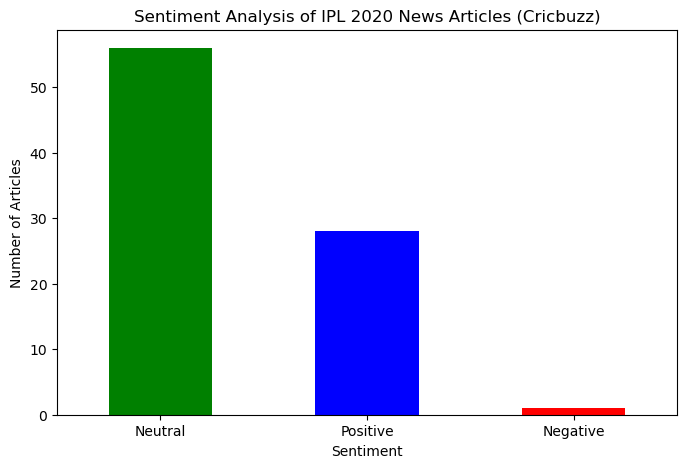

In [103]:
import matplotlib.pyplot as plt

# ✅ Count sentiment types
sentiment_counts = df["Sentiment"].value_counts()

# ✅ Plot a bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["green", "blue", "red"])
plt.title("Sentiment Analysis of IPL 2020 News Articles (Cricbuzz)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.show()

In [106]:
# ✅ Find the most positive article
most_positive = df.loc[df["Content"].apply(lambda x: TextBlob(x).sentiment.polarity).idxmax()]
print("\n🌟 Most Positive Article:\n", most_positive[["Title", "Sentiment"]])

# ✅ Find the most negative article
most_negative = df.loc[df["Content"].apply(lambda x: TextBlob(x).sentiment.polarity).idxmin()]
print("\n🚨 Most Negative Article:\n", most_negative[["Title", "Sentiment"]])


🌟 Most Positive Article:
 Title        'The greatest T20 team of all time'
Sentiment                               Positive
Name: 76, dtype: object

🚨 Most Negative Article:
 Title        Amidst the riches, the IPL retains its youthfu...
Sentiment                                             Negative
Name: 60, dtype: object


In [108]:
# ✅ Define team keywords
teams = ["Mumbai Indians", "Delhi Capitals", "RCB", "SRH", "KKR", "CSK", "RR", "KXIP"]

# ✅ Assign each article to a team
def identify_team(text):
    for team in teams:
        if team in text:
            return team
    return "Other"

df["Team"] = df["Content"].apply(identify_team)

# ✅ Sentiment count per team
team_sentiment = df.groupby("Team")["Sentiment"].value_counts().unstack()

# ✅ Display the sentiment breakdown per team
print(team_sentiment)

Sentiment       Negative  Neutral  Positive
Team                                       
Delhi Capitals       NaN      NaN       4.0
Mumbai Indians       NaN      NaN      18.0
Other                1.0     56.0       1.0
RCB                  NaN      NaN       4.0
SRH                  NaN      NaN       1.0


In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate a word cloud for Positive articles
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Content"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# ✅ Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🌟 Most Common Words in Positive Articles")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [112]:
!pip install wordcloud

/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


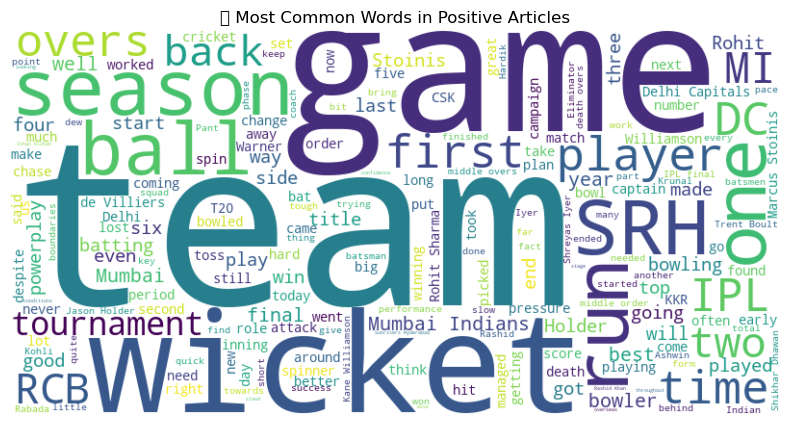

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate a word cloud for Positive articles
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Content"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# ✅ Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🌟 Most Common Words in Positive Articles")
plt.show()